In [1]:
# load libraries
library(dplyr)
library("edgeR")
library(Matrix)
library(gplots)
library(RColorBrewer)
library(irlba)
library(proxy)
library(png)
library(tidyverse)
library(ComplexHeatmap)
library(here)


working_dir <- "/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor"

file_names <- c("/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.12_ncell_231.NA.cluster_specific.tsv",
"/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.24_ncell_153.NA.cluster_specific.tsv",
"/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.28_ncell_65.NA.cluster_specific.tsv",
"/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.bundle_sheath_ncell_466.NA.cluster_specific.tsv",
"/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.companion_cells_ncell_517.NA.cluster_specific.tsv",
"/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.epidermis_ncell_1130.NA.cluster_specific.tsv",
"/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.mesophyll_ncell_1586.NA.cluster_specific.tsv",
"/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.parenchyma_ncell_1045.NA.cluster_specific.tsv",
"/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.protoderm_ncell_314.NA.cluster_specific.tsv",
"/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.subsidiary_mother_cell_ncell_289.NA.cluster_specific.tsv",
"/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.vascular_sclerenchyma_ncell_325.NA.cluster_specific.tsv",
"/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.vasculature_ncell_788.NA.cluster_specific.tsv",
"/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.xylem_ncell_625.NA.cluster_specific.tsv")

read_DA_genes <- function(file_name){
    working_dir <- "/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor"
    filtered <- read_tsv(file_name, col_names = TRUE,id = "origin")  %>% 
        mutate(origin = str_replace(origin,"/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/sorghum_annot_DA_genes.V2/Sb.DA_genes.V1.", ""))  %>% 
        mutate(origin = str_replace(origin, ".NA.cluster_specific.tsv", ""))  %>% 
            filter(padj < .05)
    
    return(filtered)    
}

read_all_DA_genes <- lapply(file_names, read_DA_genes)
all_merge_values <- data.table::rbindlist(read_all_DA_genes)

merge_values <- all_merge_values %>% 
    group_by(origin) %>% 
    slice_min(padj, n =5)

    

table(merge_values$gene_name)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: limma


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess



Attaching package: ‘proxy’


The following object is masked from ‘package:Matrix’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1596 Columns: 8
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): gene_name
dbl (6): baseMean, log2FoldChange, lfcSE, stat, pvalue, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3882 Columns: 8
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): gene_name
dbl (6): baseMean, log2FoldChange, lfcSE, stat, pvalue, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_typ


              Sobic.001G224300               Sobic.001G283100 
                             1                              1 
              Sobic.001G320500               Sobic.001G349700 
                             1                              1 
              Sobic.001G474300               Sobic.001G540250 
                             2                              1 
              Sobic.002G200900               Sobic.002G207900 
                             1                              3 
              Sobic.002G226400               Sobic.002G292000 
                             1                              1 
              Sobic.003G048700               Sobic.003G086300 
                             1                              1 
              Sobic.003G237300               Sobic.003G251800 
                             1                              1 
              Sobic.003G309700               Sobic.003G340300 
                             1                        

In [2]:
head(read_all_DA_genes)

[[1]]
# A tibble: 93 × 8
   origin       gene_name   baseMean log2FoldChange lfcSE  stat   pvalue    padj
   <chr>        <chr>          <dbl>          <dbl> <dbl> <dbl>    <dbl>   <dbl>
 1 12_ncell_231 Sobic.005G…    163.           -1.54 0.236 -6.53 6.60e-11 8.32e-7
 2 12_ncell_231 Sobic.003G…     78.4          -2.32 0.376 -6.17 6.92e-10 3.18e-6
 3 12_ncell_231 Sobic.006G…    101.           -1.90 0.309 -6.15 7.57e-10 3.18e-6
 4 12_ncell_231 Sobic.009G…    101.           -1.79 0.305 -5.88 4.05e- 9 1.28e-5
 5 12_ncell_231 Sobic.007G…     82.0          -1.94 0.346 -5.59 2.25e- 8 4.72e-5
 6 12_ncell_231 Sobic.001G…    120.           -1.59 0.286 -5.54 3.04e- 8 5.48e-5
 7 12_ncell_231 Sorbiv5.1_…     78.1          -1.99 0.360 -5.51 3.50e- 8 5.51e-5
 8 12_ncell_231 Sobic.001G…    140.           -1.36 0.255 -5.32 1.04e- 7 1.46e-4
 9 12_ncell_231 Sobic.001G…     77.9          -1.82 0.353 -5.15 2.63e- 7 2.55e-4
10 12_ncell_231 Sobic.003G…    112.           -1.48 0.286 -5.16 2.52e- 7 2.55e-4
# … with 83 more rows

[[2]]
# A tibble: 45 × 8
   origin       gene_name    baseMean log2FoldChange lfcSE  stat  pvalue    padj
   <chr>        <chr>           <dbl>          <dbl> <dbl> <dbl>   <dbl>   <dbl>
 1 24_ncell_153 Sobic.003G0…     77.4          -2.27 0.385 -5.90 3.72e-9 2.33e-5
 2 24_ncell_153 Sorbiv5.1_p…     35.3          -4.45 0.852 -5.22 1.80e-7 3.75e-4
 3 24_ncell_153 ta.jpa7.902…    187.           -1.34 0.256 -5.23 1.73e-7 3.75e-4
 4 24_ncell_153 Sorbiv5.1_p…     63.3          -2.14 0.419 -5.12 3.04e-7 4.75e-4
 5 24_ncell_153 Sorbiv5.1_p…     30.0          -4.23 0.873 -4.85 1.24e-6 1.55e-3
 6 24_ncell_153 Sorbiv5.1_p…     81.1          -1.74 0.365 -4.77 1.80e-6 1.88e-3
 7 24_ncell_153 Sorbiv5.1_p…     29.4          -3.57 0.759 -4.71 2.51e-6 2.24e-3
 8 24_ncell_153 Sobic.007G2…     45.9          -2.23 0.492 -4.53 5.88e-6 3.36e-3
 9 24_ncell_153 Sobic.009G0…     32.5          -2.94 0.642 -4.58 4.63e-6 3.36e-3
10 24_ncell_153 Sobic.009G1…     57.1          -1.95 0.428 -4.56 5.15e-6 3.36e-3
# … with 35 more rows

[[3]]
# A tibble: 94 × 8
   origin      gene_name     baseMean log2FoldChange lfcSE  stat  pvalue    padj
   <chr>       <chr>            <dbl>          <dbl> <dbl> <dbl>   <dbl>   <dbl>
 1 28_ncell_65 Sorbiv5.1_pg…     37.5          -3.94 0.715 -5.50 3.73e-8 3.04e-4
 2 28_ncell_65 Sobic.004G25…     30.8          -3.82 0.755 -5.06 4.20e-7 1.71e-3
 3 28_ncell_65 Sobic.007G16…     32.4          -2.87 0.616 -4.67 3.02e-6 4.92e-3
 4 28_ncell_65 Sobic.001G32…     33.9          -2.69 0.590 -4.55 5.34e-6 5.14e-3
 5 28_ncell_65 Sobic.009G17…     32.1          -3.06 0.678 -4.52 6.31e-6 5.14e-3
 6 28_ncell_65 Sorbiv5.1_pg…     31.5          -2.95 0.651 -4.54 5.70e-6 5.14e-3
 7 28_ncell_65 Sorbiv5.1_pg…     25.2          -3.56 0.780 -4.56 5.06e-6 5.14e-3
 8 28_ncell_65 ta.jpa7.902.…     24.8          -4.18 0.910 -4.59 4.45e-6 5.14e-3
 9 28_ncell_65 Sobic.001G33…     22.8          -4.00 0.896 -4.46 8.15e-6 6.04e-3
10 28_ncell_65 Sobic.002G06…     15.8          -6.96 1.59  -4.38 1.17e-5 7.32e-3
# … with 84 more rows

[[4]]
# A tibble: 872 × 8
   origin       gene_name baseMean log2FoldChange lfcSE   stat   pvalue     padj
   <chr>        <chr>        <dbl>          <dbl> <dbl>  <dbl>    <dbl>    <dbl>
 1 bundle_shea… Sorbiv5.…     310.          -2.19 0.185 -11.9  2.12e-32 3.97e-28
 2 bundle_shea… Sobic.00…     181.          -2.90 0.261 -11.1  1.08e-28 1.02e-24
 3 bundle_shea… Sobic.00…     175.          -2.62 0.257 -10.2  2.78e-24 1.34e-20
 4 bundle_shea… Sorbiv5.…     253.          -2.22 0.218 -10.2  2.86e-24 1.34e-20
 5 bundle_shea… Sobic.00…     153.          -2.32 0.263  -8.83 1.07e-18 3.36e-15
 6 bundle_shea… Sobic.00…     152.          -2.26 0.262  -8.62 6.47e-18 1.73e-14
 7 bundle_shea… Sobic.00…     148.          -2.31 0.269  -8.61 7.50e-18 1.76e-14
 8 bundle_shea… Sobic.00…     148.          -2.29 0.269  -8.52 1.56e-17 3.24e-14
 9 bundle_shea… Sorbiv5.…     139.          -2.37 0.280  -8.48 2.26e-17 4.24e-14
10 bundle_shea… Sobic.0

In [3]:
# load arguments
#args <- commandArgs(T)
#if(length(args)!=5){stop("Rscript normGBA.R <gene.sparse> <meta> <Zea_mays.AGPv4.36.Allgene.nuclear.bed> <prefix> <F>")}
#input_data <- as.character(args[1])
#meta <- as.character(args[2])
#gene <- as.character(args[3])
#prefix <- as.character(args[4])



#gene_bodysorghum_bicolor_tis_leaf_nmf_step_2_knn_27.out.de_novo.rds
input <- here(working_dir,"00.data/sorghum_bicolor.gene_body_acc_leaf_svd_knn_100_strict.counts.tab.txt")
#input_2 <- here("/home/jpm73279/r_script_dev/lw_plotting","zea_mays.normalized_gene_acc_scores.leaf_svd_knn_100_strict.GBaccessibility.sparse")
meta <- here(working_dir,"00.data/Sb_leaf_svd.knn_100_strict.meta.annotation_V1.txt")
gene <- here(working_dir,"00.data/Sb_leaf.maize_markers.ortho.visualize.bed")
gene_DA <- here(working_dir,"00.data/Sbicolorv5.1.gene.bed")
#prefix <- "TEST_SORGHUM_TEST"

meta_data <- read.delim(meta)
gene_markers <- read.delim(gene)
gene_markers <- gene_markers  %>%
    arrange(type)

all_markers <- gene_markers$geneID

raw_cpm_counts_all_genes <- read_delim(input, delim="\t", col_names = c("gene_name", "barcode", "accessability")) %>%
    dplyr::mutate(cellID = barcode)  %>%
    dplyr::mutate(geneID = gene_name)

colnames(meta_data)

merged_meta_cpm_information <- left_join(meta_data, raw_cpm_counts_all_genes, by = c("cellID"))  %>%
    #mutate(safe_cluster_name = str_c("Louvain_C", LouvainClusters, sep ="_"))  %>%
    #dplyr::select(-LouvainClusters)  %>%
    group_by(V1_annotation_n, geneID)  %>%
    summarise(counts = sum(accessability, na.rm = TRUE))

### Alt CPM Calc
merged_meta_cpm_information_copied <- merged_meta_cpm_information
catch <- merged_meta_cpm_information_copied  %>%
    group_by(V1_annotation_n) %>%
    group_map(~(cpm(.x$counts, log = FALSE, group = .f)), .keep = TRUE)  %>%
    unlist()



caught_values <- as_tibble(catch)
see <- ungroup(merged_meta_cpm_information_copied)
merged_meta_cpm_information_copied<- bind_cols(merged_meta_cpm_information_copied,caught_values)  %>% 
    rename(grouped_CPM = value)


head(merged_meta_cpm_information_copied)
test_wider <- merged_meta_cpm_information_copied %>% 
    dplyr::select(-counts) %>% 
    pivot_wider(names_from = geneID, values_from = grouped_CPM, values_fill = 0) %>% 
    pivot_longer(cols = -V1_annotation_n, names_to = "geneID", values_to = "grouped_CPM") %>% 
    group_by(geneID) %>% 
    mutate(Zscore = scale(grouped_CPM)) %>% 
    ungroup()  %>% 
    #mutate(relative_accessability = rescale(Zscore, to = c(0,1))) %>% 
    group_by(V1_annotation_n)  %>% 
    mutate(Zscore_group = scale(grouped_CPM)) %>% 
    filter(geneID %in% merge_values$gene_name)

    
    

Rows: 35643126 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): gene_name, barcode
dbl (1): accessability

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "cellID"                    "total"                    
 [3] "tss"                       "acrs"                     
 [5] "ptmt"                      "nSites"                   
 [7] "log10nSites"               "sampleID"                 
 [9] "umap1"                     "umap2"                    
[11] "doubletscore"              "d.type"                   
[13] "LouvainClusters"           "cell_annotation_glmnet"   
[15] "cell_annotation_knn"       "cell_annotation_enrich"   
[17] "cell_annotation_smooth"    "cluster_annotation_glmnet"
[19] "cluster_annotation_knn"    "cluster_annotation_smooth"
[21] "cluster_annotation_enrich" "LouvainClusters_t"        
[23] "V1_annotation"             "total_cell_count"         
[25] "V1_annotation_n"

`summarise()` has grouped output by 'V1_annotation_n'. You can override using the `.groups` argument.


V1_annotation_n geneID               counts grouped_CPM
1 12_ncell_231    888jpa7.g114936.t1.g  2      2.087888  
2 12_ncell_231    888jpa7.g116981.t1.g  2      2.087888  
3 12_ncell_231    888jpa7.g117717.t1.g 41     42.801695  
4 12_ncell_231    888jpa7.g121623.t1.g 10     10.439438  
5 12_ncell_231    888jpa7.g135363.t1.g  4      4.175775  
6 12_ncell_231    888jpa7.g135679.t1.g  6      6.263663

In [4]:
(meta_data)  %>% 
    summarise(n())

n() 
1 7534

In [5]:
# Create Proportion Cells Accessible Metrics ------------------------------
merged_meta_cellID_values <- left_join(meta_data, raw_cpm_counts_all_genes, by = c("cellID"))
take_unq_genes <- unique(merged_meta_cellID_values$geneID)


merged_meta_cellID_values_all_genes <- merged_meta_cellID_values %>% 
    select(cellID, V1_annotation_n, accessability, geneID) 


colnames(merged_meta_cellID_values_all_genes)
colnames(merged_meta_cellID_values_all_genes)

wider_all_genes <- merged_meta_cellID_values_all_genes %>% 
                    filter(geneID %in% merge_values$gene_name) %>% 
                    pivot_wider(names_from = geneID, 
                                values_from = accessability,  
                                values_fill = 0) %>% 
                    pivot_longer(cols = c(-V1_annotation_n, -cellID), 
                                 names_to = "geneID", 
                                 values_to = "accessability") %>% 
                    mutate(expression_bool = case_when(accessability <= 2 ~ 0,
                                                       accessability > 2 ~ 1)) %>% 
                    group_by(V1_annotation_n, geneID) %>% 
                    summarise(total_cells = n(), 
                              proportion_expressing = (sum(expression_bool)/total_cells * 100))


colnames(merged_meta_cellID_values_all_genes)
merged_meta_cellID_values_all_genes %>% 
    group_by(V1_annotation_n) %>% 
    select(-accessability, -cellID) %>% 
    unique() %>% 
    summarise(count = n())



final_plotting_dot <- left_join(test_wider, wider_all_genes, by = c("V1_annotation_n", "geneID")) %>% 
        left_join(., merge_values, by = c("geneID" = "gene_name")) %>% 
        mutate(plotting_name = str_c(origin,geneID, sep = "__"))

[1] "cellID"          "V1_annotation_n" "accessability"   "geneID"

[1] "cellID"          "V1_annotation_n" "accessability"   "geneID"

`summarise()` has grouped output by 'V1_annotation_n'. You can override using the `.groups` argument.


[1] "cellID"          "V1_annotation_n" "accessability"   "geneID"

V1_annotation_n                  count
1  12_ncell_231                     28802
2  24_ncell_153                     27878
3  28_ncell_65                      23966
4  bundle_sheath_ncell_466          31635
5  companion_cells_ncell_517        33224
6  epidermis_ncell_1130             33338
7  mesophyll_ncell_1586             33752
8  parenchyma_ncell_1045            33464
9  protoderm_ncell_314              31475
10 subsidiary_mother_cell_ncell_289 31716
11 vascular_sclerenchyma_ncell_325  31747
12 vasculature_ncell_788            33267
13 xylem_ncell_625                  34791

Loading required package: viridisLite



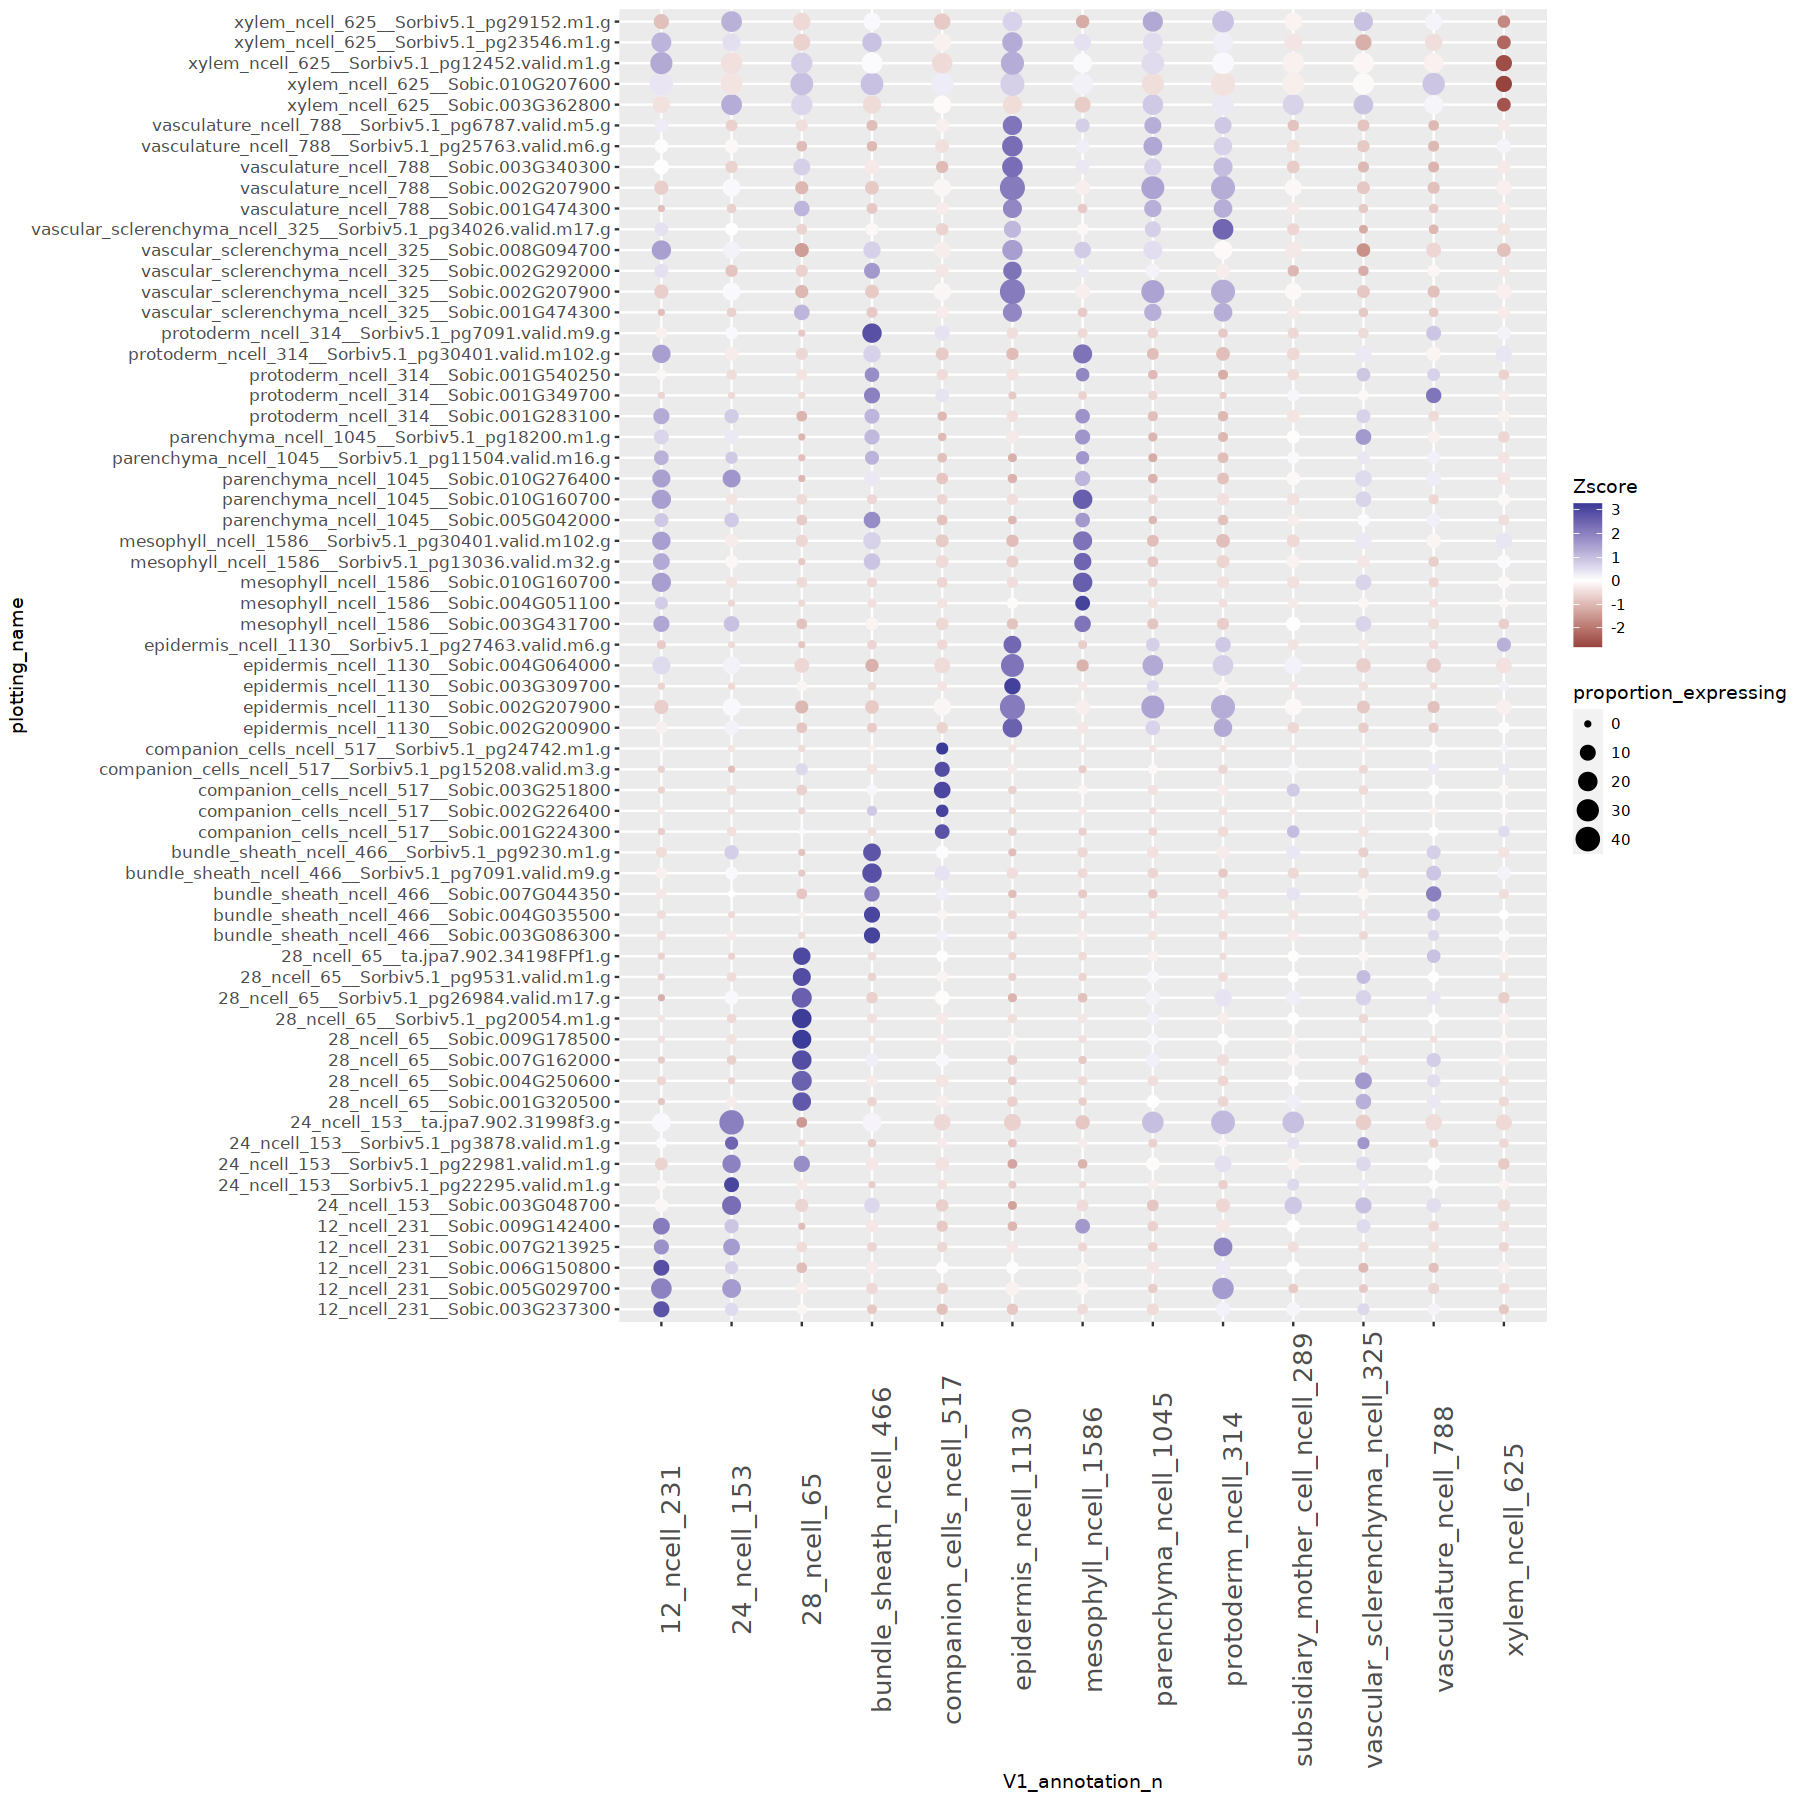

In [6]:
library(viridis)
library(repr)
options(repr.plot.width=15, repr.plot.height=15)


ggplot(final_plotting_dot, aes(x=V1_annotation_n, y = plotting_name, 
                               color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2() +
    theme(axis.text.x = element_text(size = 15),
         axis.text.y = element_text(size = 10)) 

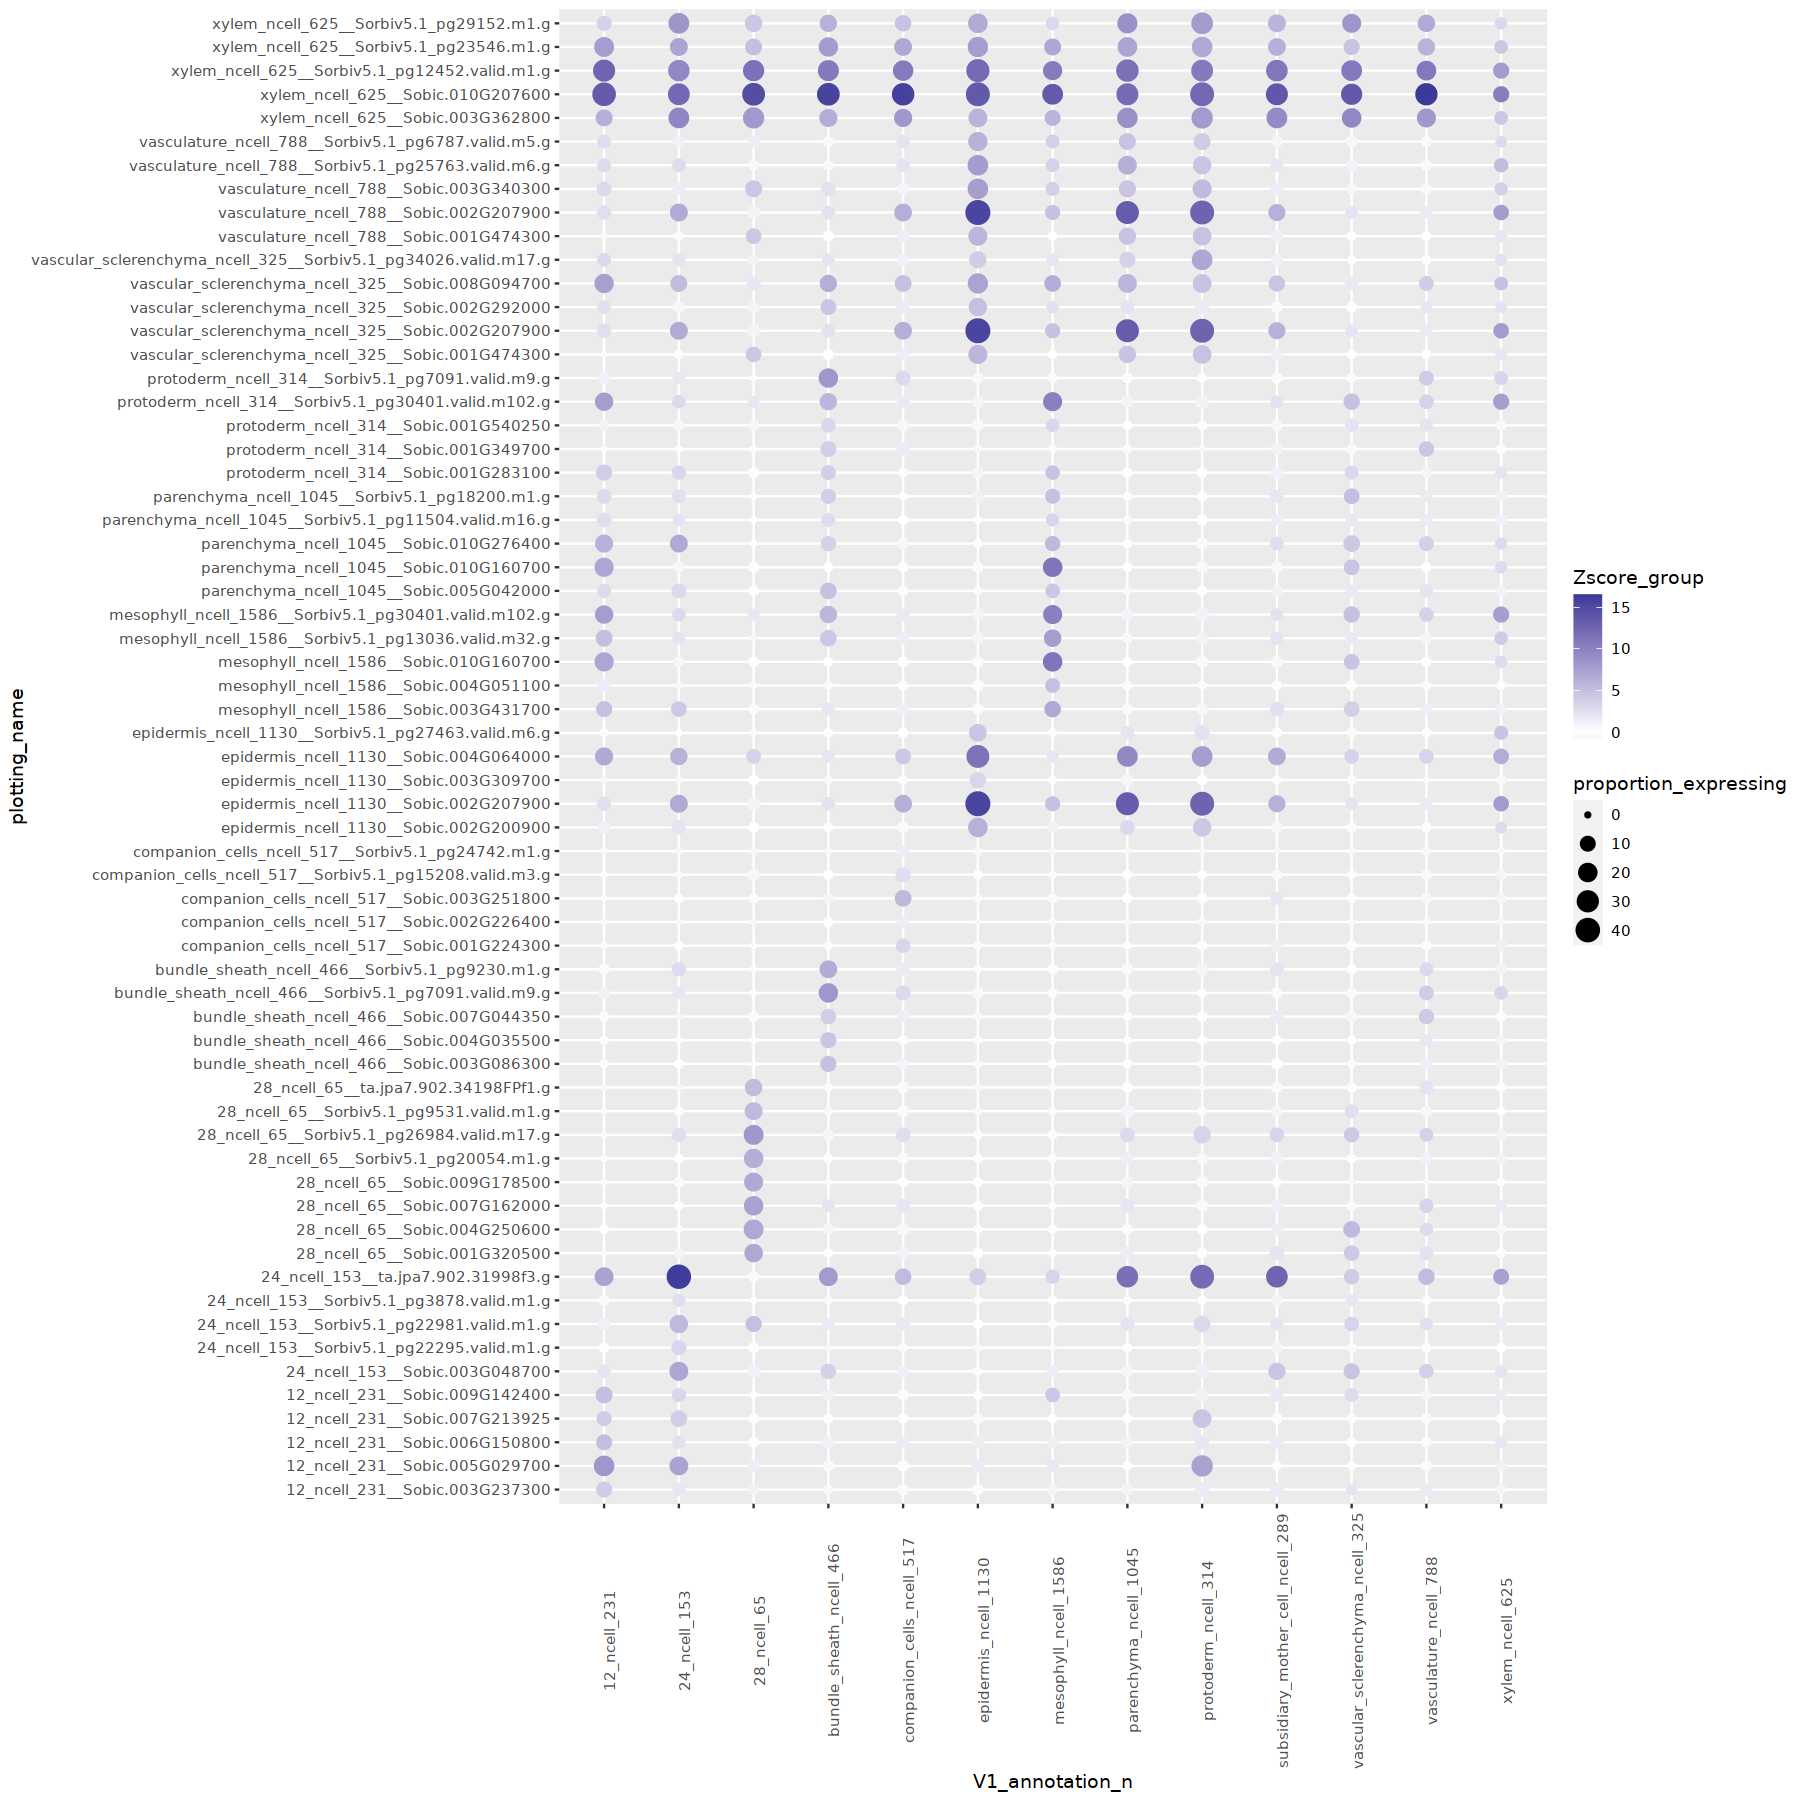

In [7]:
library(viridis)
library(repr)
options(repr.plot.width=15, repr.plot.height=15)


ggplot(final_plotting_dot, aes(x=V1_annotation_n, y = plotting_name, 
                               color = Zscore_group, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2()

In [8]:
unique(final_plotting_dot$V2_annotation_n)

Warning message:
“Unknown or uninitialised column: `V2_annotation_n`.”


NULL

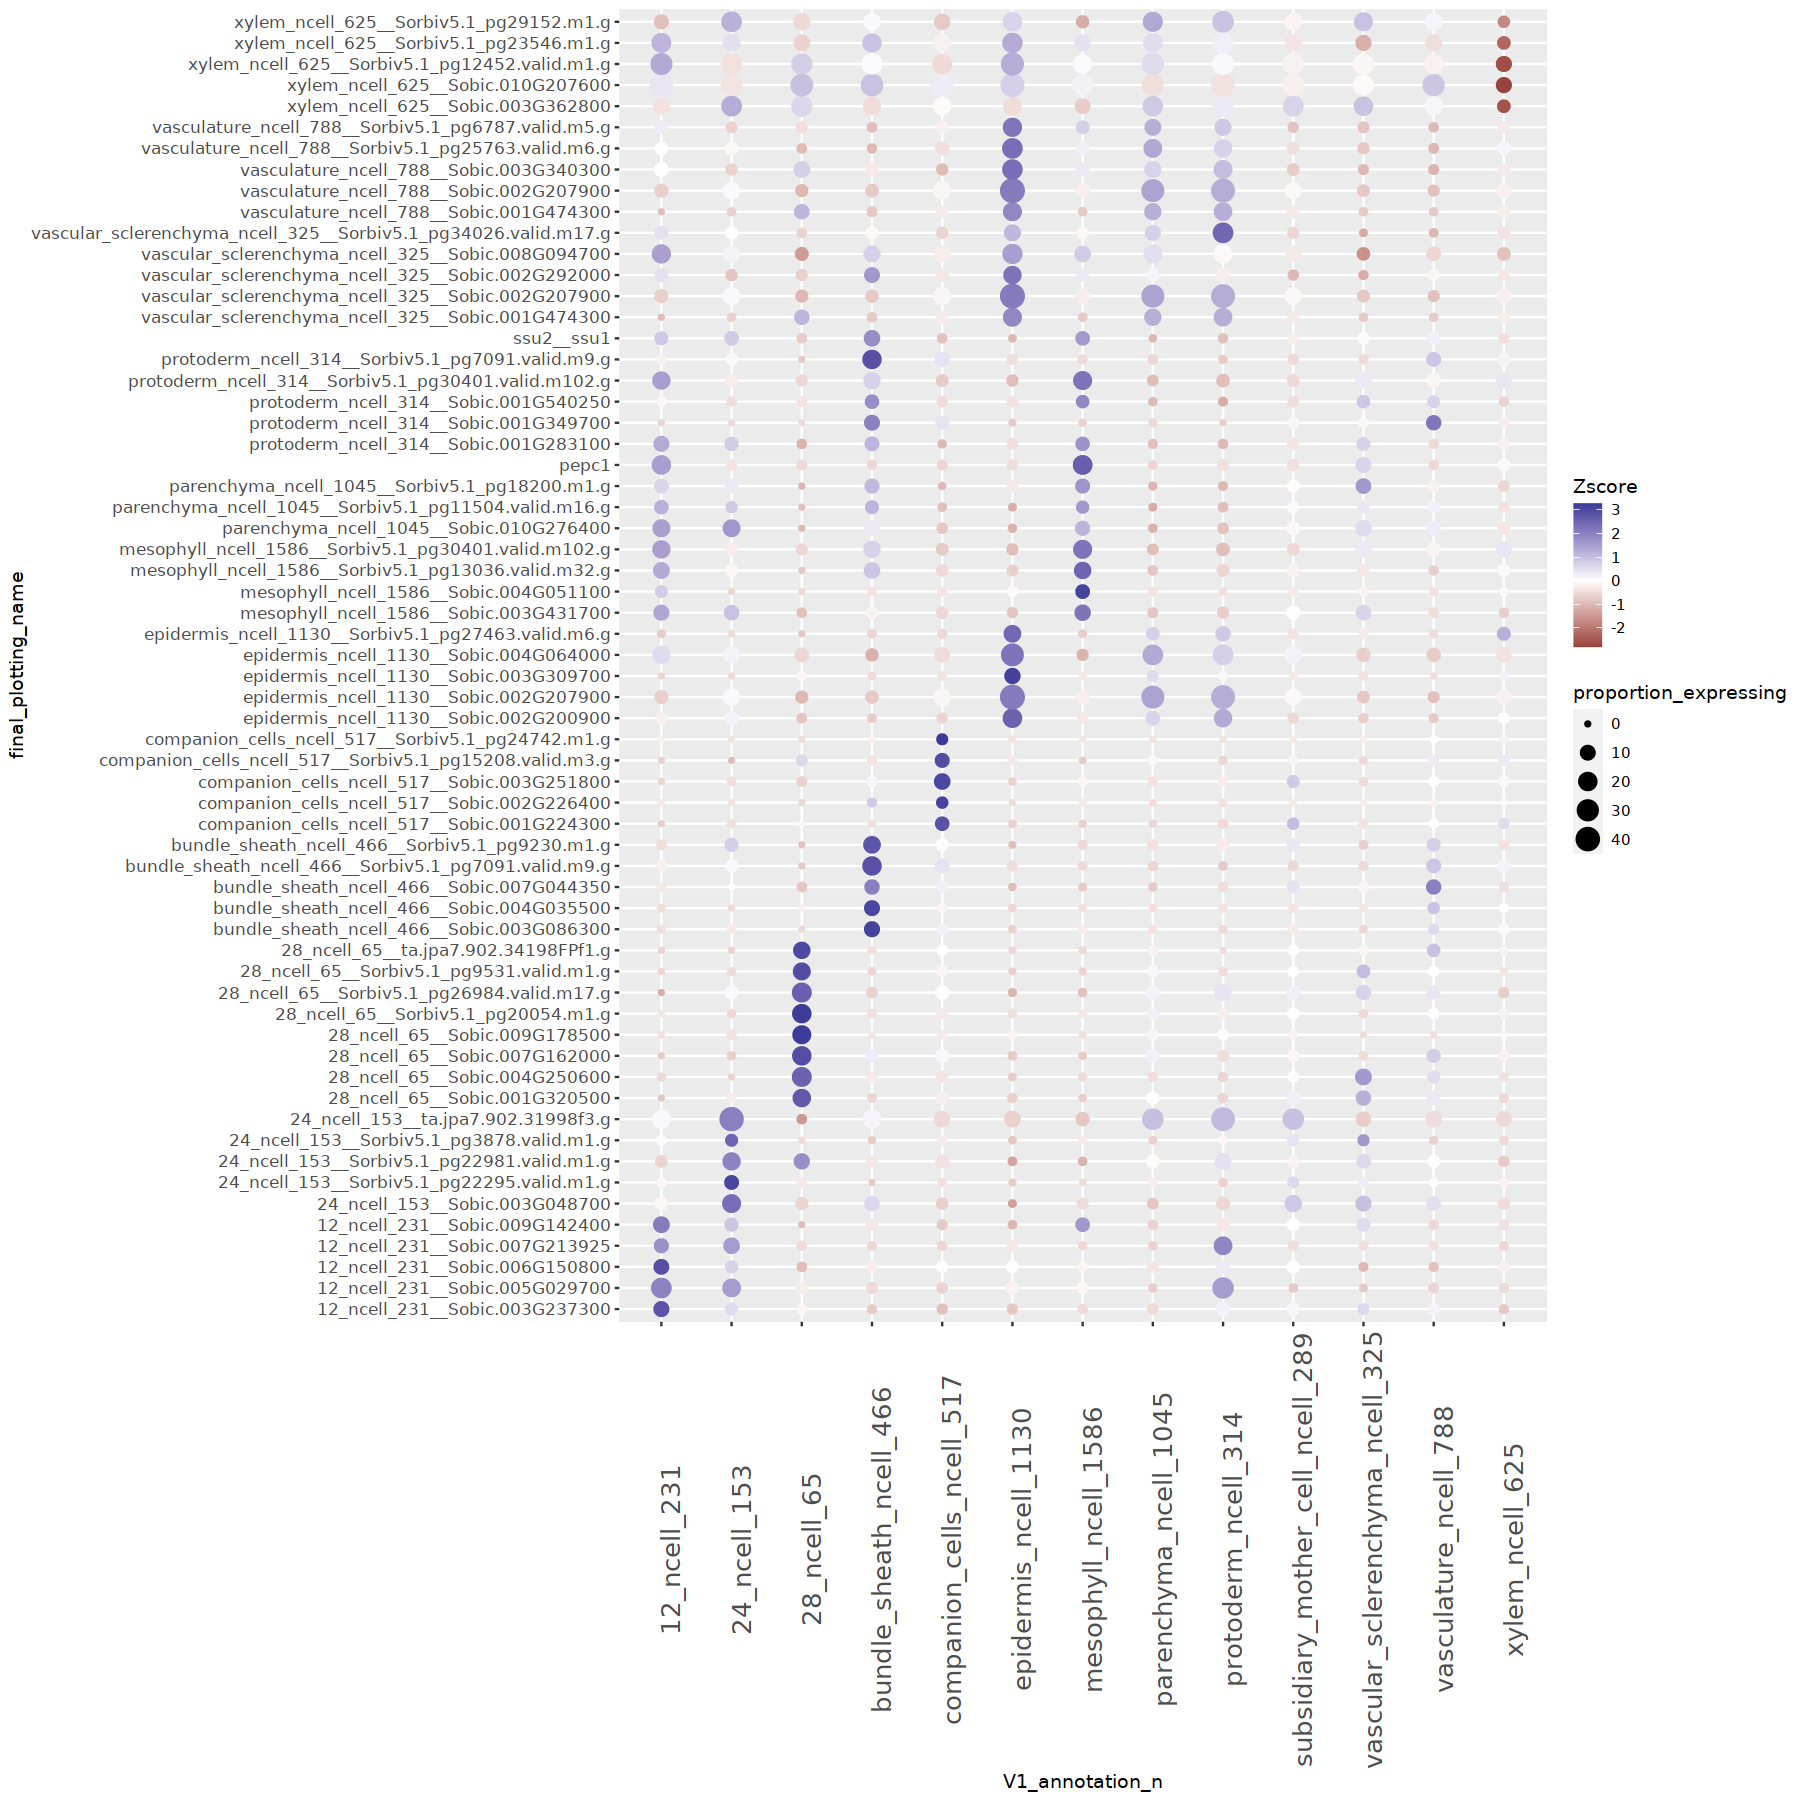

In [9]:
combined_plot_markers <- left_join(final_plotting_dot, gene_markers, by = "geneID")  %>% 
    mutate(final_plotting_name = case_when(is.na(name) != TRUE ~ name,
                                          is.na(name) == TRUE ~plotting_name))

options(repr.plot.width=15, repr.plot.height=15)
ggplot(combined_plot_markers, aes(x=V1_annotation_n, y = final_plotting_name, 
                               color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2() +
    theme(axis.text.x = element_text(size = 15),
         axis.text.y = element_text(size = 10))   


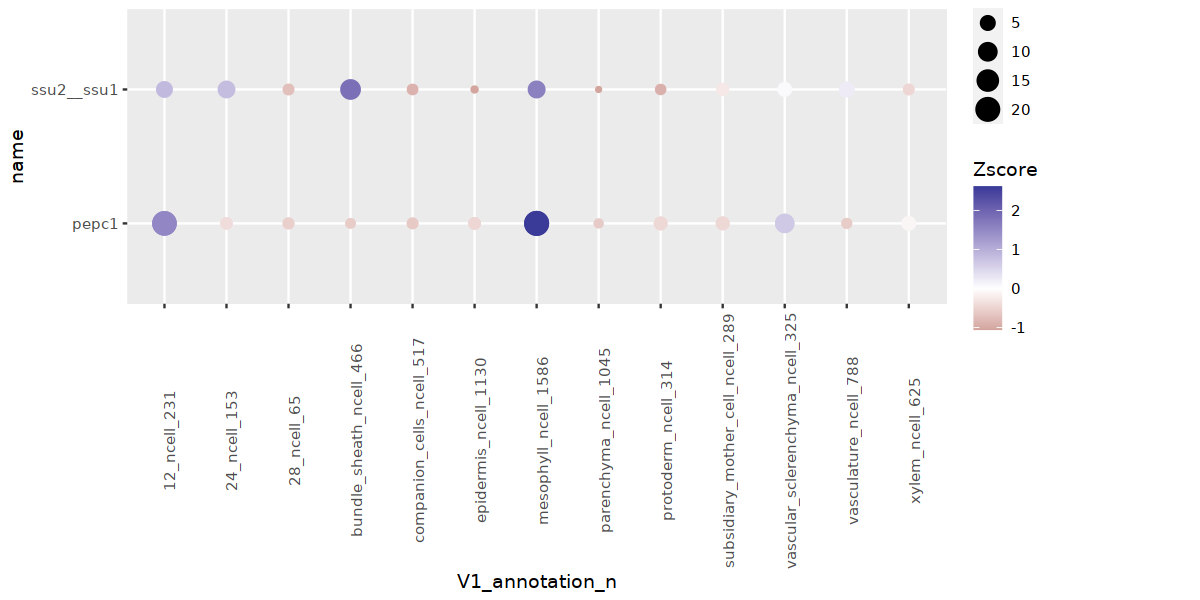

In [10]:
options(repr.plot.width=10, repr.plot.height=5)

combined_plot_markers  %>% 
    filter(is.na(name)!= TRUE)  %>% 
    ggplot(., aes(x=V1_annotation_n, y = name, 
                               color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2()

In [11]:
log2fc_values <- merge_values  %>% 
    group_by(origin) %>% 
    arrange(log2FoldChange) %>% 
    head(5)
    

## Dot Plot For Just Marker Genes

In [12]:
cell_accessability_markers <- merged_meta_cpm_information_copied %>% 
    dplyr::select(-counts) %>% 
    pivot_wider(names_from = geneID, values_from = grouped_CPM, values_fill = 0) %>% 
    pivot_longer(cols = -V1_annotation_n, names_to = "geneID", values_to = "grouped_CPM") %>% 
    group_by(geneID) %>% 
    mutate(Zscore = scale(grouped_CPM)) %>% 
    #mutate(relative_accessability = rescale(Zscore, to = c(0,1))) %>% 
    filter(geneID %in% all_markers) 
    
    

# Create Proportion Cells Accessible Metrics ------------------------------
merged_meta_cellID_values <- left_join(meta_data, raw_cpm_counts_all_genes, by = c("cellID"))
take_unq_genes <- unique(merged_meta_cellID_values$geneID)


merged_meta_cellID_values_all_genes <- merged_meta_cellID_values %>% 
    select(cellID, V1_annotation_n, accessability, geneID) 


colnames(merged_meta_cellID_values_all_genes)
colnames(merged_meta_cellID_values_all_genes)

cell_accessability_wider_all_genes <- merged_meta_cellID_values_all_genes %>% 
                    filter(geneID %in% all_markers) %>% 
                    pivot_wider(names_from = geneID, 
                                values_from = accessability,  
                                values_fill = 0) %>% 
                    pivot_longer(cols = c(-V1_annotation_n, -cellID), 
                                 names_to = "geneID", 
                                 values_to = "accessability") %>% 
                    mutate(expression_bool = case_when(accessability <= 2 ~ 0,
                                                       accessability > 2 ~ 1)) %>% 
                    group_by(V1_annotation_n, geneID) %>% 
                    summarise(total_cells = n(), 
                              proportion_expressing = (sum(expression_bool)/total_cells * 100))


colnames(merged_meta_cellID_values_all_genes)
merged_meta_cellID_values_all_genes %>% 
    group_by(V1_annotation_n) %>% 
    select(-accessability, -cellID) %>% 
    unique() %>% 
    summarise(count = n())

[1] "cellID"          "V1_annotation_n" "accessability"   "geneID"

[1] "cellID"          "V1_annotation_n" "accessability"   "geneID"

`summarise()` has grouped output by 'V1_annotation_n'. You can override using the `.groups` argument.


[1] "cellID"          "V1_annotation_n" "accessability"   "geneID"

V1_annotation_n                  count
1  12_ncell_231                     28802
2  24_ncell_153                     27878
3  28_ncell_65                      23966
4  bundle_sheath_ncell_466          31635
5  companion_cells_ncell_517        33224
6  epidermis_ncell_1130             33338
7  mesophyll_ncell_1586             33752
8  parenchyma_ncell_1045            33464
9  protoderm_ncell_314              31475
10 subsidiary_mother_cell_ncell_289 31716
11 vascular_sclerenchyma_ncell_325  31747
12 vasculature_ncell_788            33267
13 xylem_ncell_625                  34791

In [13]:
marker_final_plotting <- left_join(cell_accessability_markers, cell_accessability_wider_all_genes, by = c("V1_annotation_n", "geneID")) %>% 
        left_join(., gene_markers, by = c("geneID"))

In [14]:
test_marker_clust <- marker_final_plotting  %>% 
    ungroup() %>% 
    dplyr::select(V1_annotation_n, Zscore, name)  %>% 
    pivot_wider(names_from = V1_annotation_n, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying

row.names(test_marker_clust) <- test_marker_clust$name  # put gene in `row`
test_marker_clust <- test_marker_clust[,-1] #drop gene column as now in rows
clust <- hclust(dist(test_marker_clust %>% as.matrix())) # hclust with distance matrix

In [15]:
mat <- marker_final_plotting %>% 
    ungroup() %>% 
    dplyr::select(V1_annotation_n, Zscore, name)  %>% 
    pivot_wider(names_from = V1_annotation_n, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying
row.names(mat) <- mat$name  # put gene in `row`
mat <- mat[,-1] #drop gene column as now in rows
v_clust <- hclust(dist(mat %>% as.matrix() %>% t())) # hclust with distance matrix

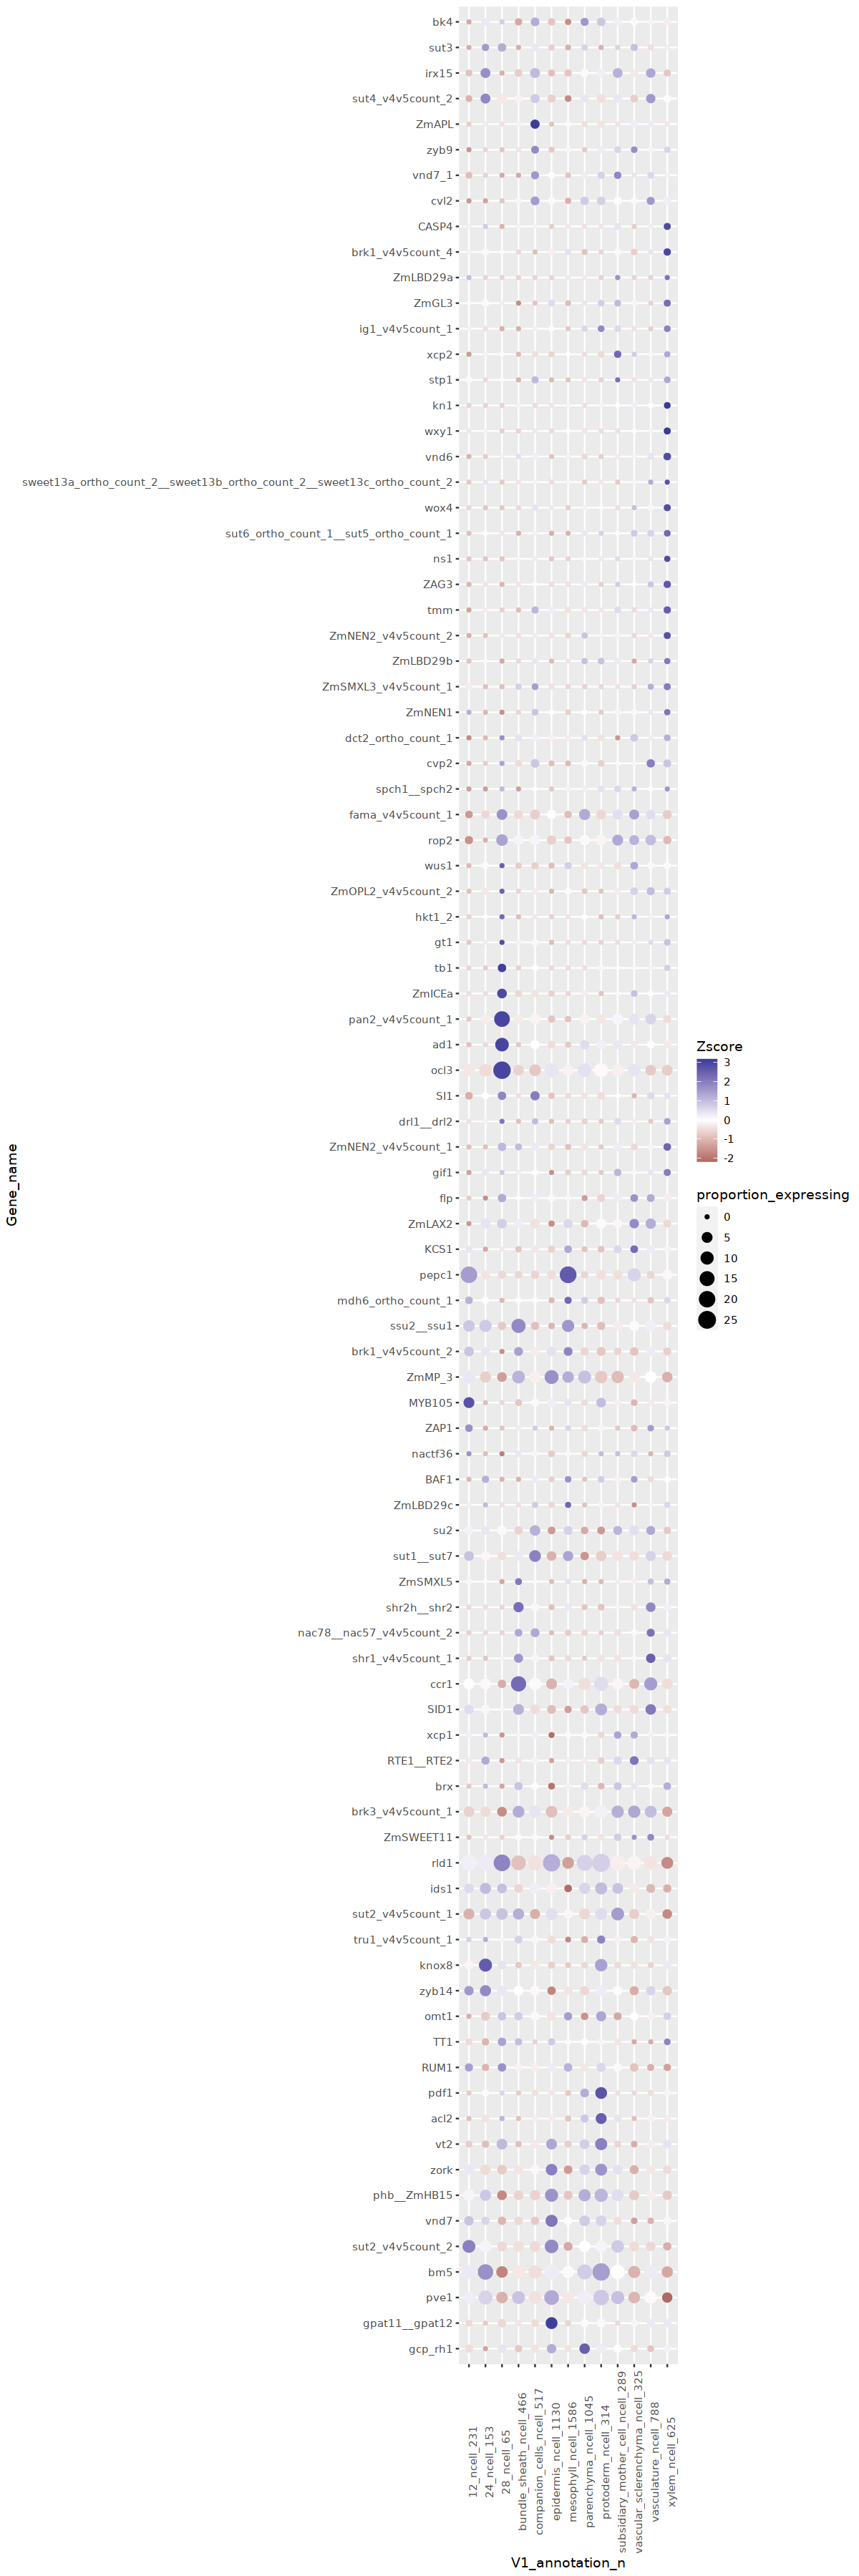

In [16]:
options(repr.plot.width=10, repr.plot.height=30)

marker_final_plotting  %>% 
    mutate(Gene_name = factor(name, clust$labels[clust$order]),
          Cluster_name = factor(V1_annotation_n, levels = v_clust$labels[v_clust$order])) %>% 
    ggplot(., aes(x=V1_annotation_n, y = Gene_name, 
                               color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2()

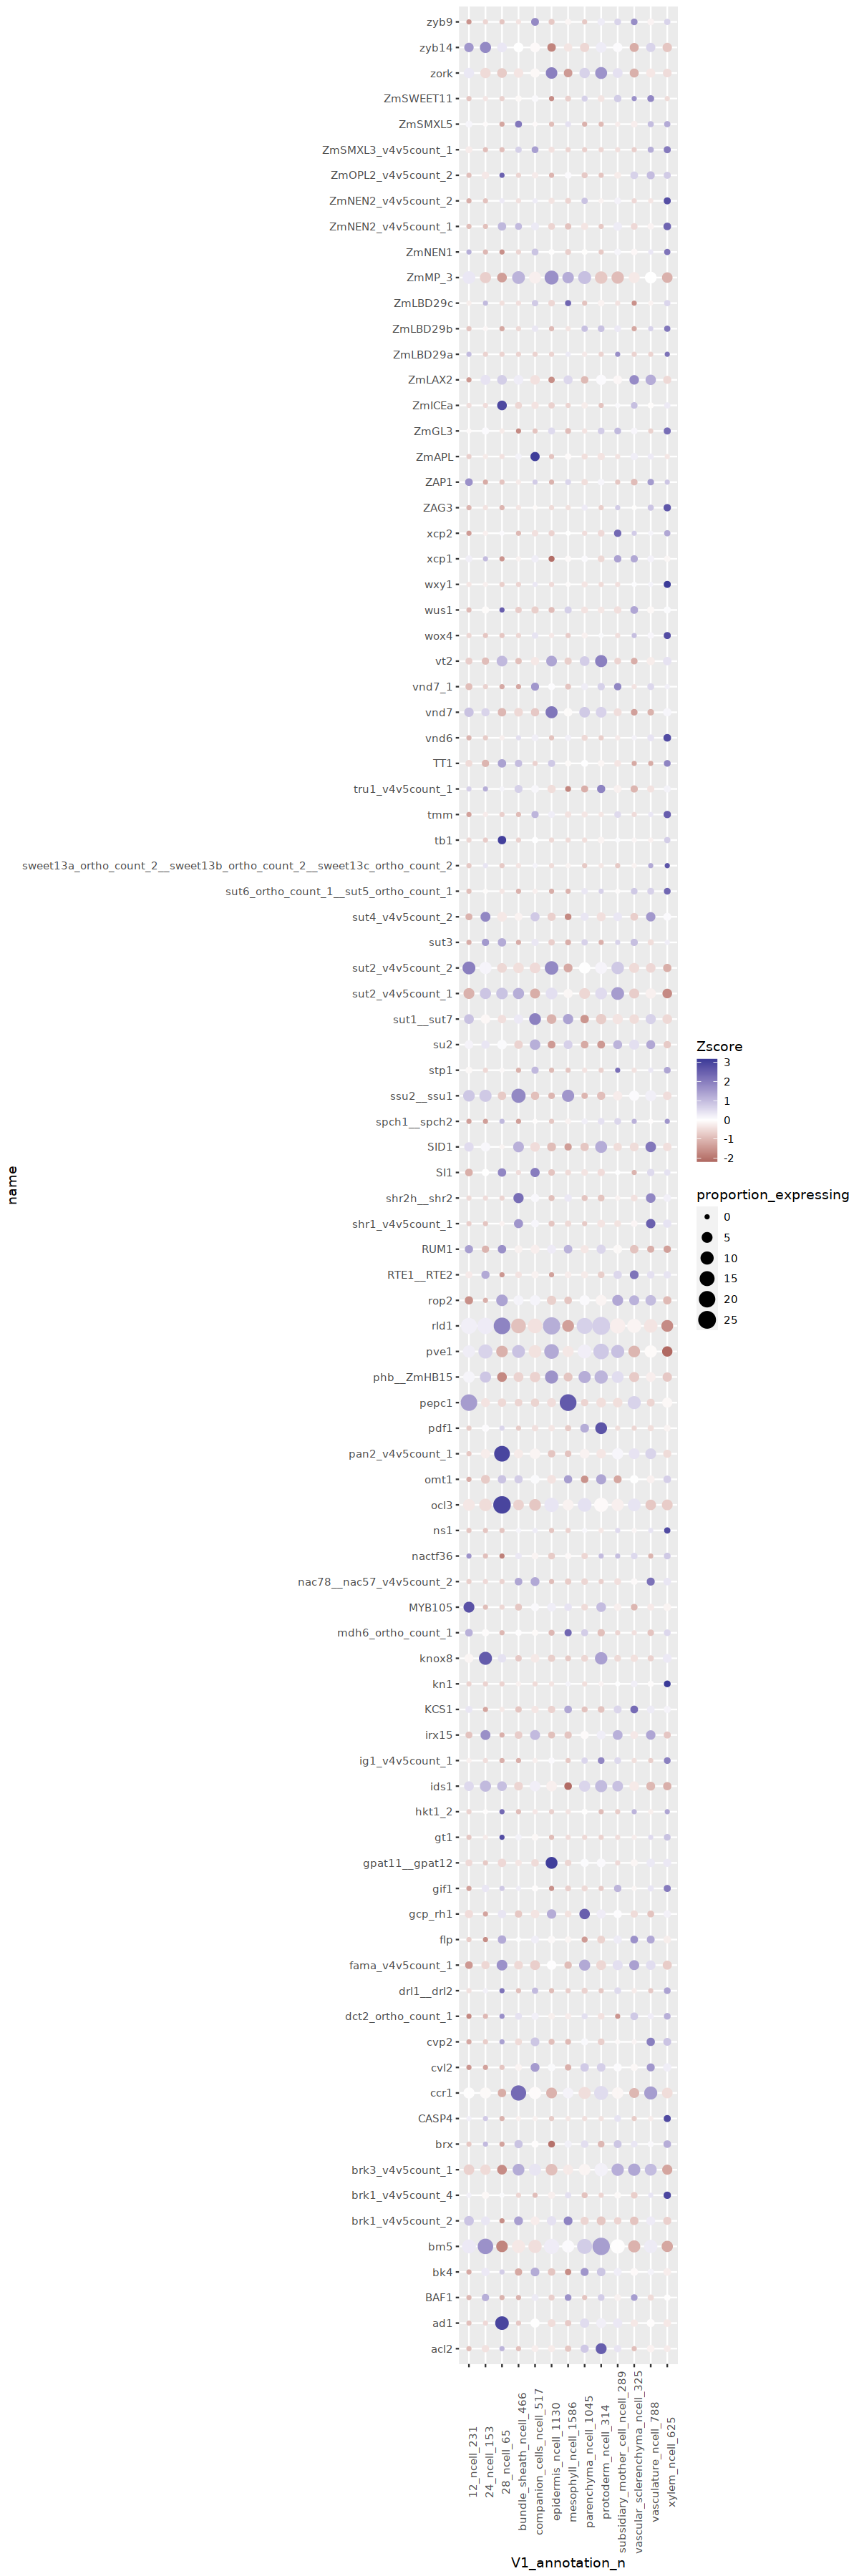

In [17]:
options(repr.plot.width=10, repr.plot.height=30)

marker_final_plotting  %>% 
    ggplot(., aes(x=V1_annotation_n, y = name, 
                               color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2()

In [18]:
marker_final_plotting

V1_annotation_n geneID           grouped_CPM Zscore       total_cells
1    12_ncell_231    Sobic.001G036800 101.262546   0.5626840   216        
2    12_ncell_231    Sobic.001G075101  36.538032  -0.1289433   216        
3    12_ncell_231    Sobic.001G101700   2.087888  -1.3350685   216        
4    12_ncell_231    Sobic.001G121600   1.043944  -0.5768262   216        
5    12_ncell_231    Sobic.001G145200   2.087888  -1.2323999   216        
6    12_ncell_231    Sobic.001G154300 183.734103   0.2645242   216        
7    12_ncell_231    Sobic.001G157400 115.877758   0.1531244   216        
8    12_ncell_231    Sobic.001G199200   2.087888  -1.5266809   216        
9    12_ncell_231    Sobic.001G251900  14.615213   1.2244750   216        
10   12_ncell_231    Sobic.001G254000   6.263663  -1.1611205   216        
11   12_ncell_231    Sobic.001G267100  14.615213  -1.4610433   216        
12   12_ncell_231    Sobic.001G327900   9.395494  -0.6820733   216        
13   12_ncell_231    Sobic.001G456000   3.131831  -0.4279970   216        
14   12_ncell_231    Sobic.001G468400   2.087888  -0.7883486   216        
15   12_ncell_231    Sobic.001G488700 116.921702   0.9297411   216        
16   12_ncell_231    Sobic.001G503100   8.351550  -0.2406198   216        
17   12_ncell_231    Sobic.001G529200   6.263663  -0.6777769   216        
18   12_ncell_231    Sobic.001G537300 302.743693   0.2402686   216        
19   12_ncell_231    Sobic.002G010100  16.703100   1.6851793   216        
20   12_ncell_231    Sobic.002G032500  24.010707  -0.7772120   216        
21   12_ncell_231    Sobic.002G050500  12.527325  -1.4967944   216        
22   12_ncell_231    Sobic.002G083600  81.427614   0.5258620   216        
23   12_ncell_231    Sobic.002G252000  18.790988  -1.2182492   216        
24   12_ncell_231    Sobic.002G270900 160.767340  -0.3371814   216        
25   12_ncell_231    Sobic.002G337800 100.218602   2.7360328   216        
26   12_ncell_231    Sobic.002G357800  16.703100  -0.5315720   216        
27   12_ncell_231    Sobic.002G384300  21.922819  -0.7185850   216        
28   12_ncell_231    Sobic.003G052700  31.318313  -0.6970105   216        
29   12_ncell_231    Sobic.003G145800   2.087888  -0.6183321   216        
30   12_ncell_231    Sobic.003G254800  69.944233   1.4639995   216        
⋮    ⋮               ⋮                ⋮           ⋮            ⋮          
1167 xylem_ncell_625 Sobic.007G166200  24.908179   0.587687640 552        
1168 xylem_ncell_625 Sobic.008G015200 110.954617  -1.278602841 552        
1169 xylem_ncell_625 Sobic.008G112300  56.609499   0.711444019 552        
1170 xylem_ncell_625 Sobic.008G132300  31.248443   0.396388010 552        
1171 xylem_ncell_625 Sobic.008G171100  48.004855   0.205278546 552        
1172 xylem_ncell_625 Sobic.008G193200  81.517678  -1.671528059 552        
1173 xylem_ncell_625 Sobic.008G193300  73.818786  -1.137838620 552        
1174 xylem_ncell_625 Sobic.009G001100  37.135831   2.410042091 552        
1175 xylem_ncell_625 Sobic.009G008800  18.115040  -0.116085183 552        
1176 xylem_ncell_625 Sobic.009G162000  44.381847   0.332081442 552        
1177 xylem_ncell_625 Sobic.009G236100  29.889815   0.155550887 552        
1178 xylem_ncell_625 Sobic.009G249900  62.496886  -0.717701181 552        
1179 xylem_ncell_625 Sobic.010G022600  24.455303   3.166437269 552        
1180 xylem_ncell_625 Sobic.010G027300  11.774776  -0.009279592 552        
1181 xylem_ncell_625 Sobic.010G093400  49.816359  -0.750572103 552        
1182 xylem_ncell_625 Sobic.010G102800  83.782058  -0.485960440 552        
1183 xylem_ncell_625 Sobic.010G160700 104.161477  -0.097520228 552        
1184 xylem_ncell_625 Sobic.010G164500  16.303536  -0.157781258 552        
1185 xylem_ncell_625 Sobic.010G261800  28.531187   0.429529346 552        
1186 xylem_ncell_625 Sobic.001G221900  28.984063  -0.322143826 552        
1187 xylem_ncell_625 Sobic.003G225500  21.738047   2.543339972 552        
1188 xylem_ncell_625 Sobic.003

# Dotplot of Maize DA orthologs in Sorghum 

In [19]:
Zm_da_genes_orthos_sb <- "/scratch/jpm73279/comparative_single_cell/08.annotation_figures/orthologs_zea_DA_vs_SB/Sb.Zm_DA_markers.markers.bed"

test <- read_delim(Zm_da_genes_orthos_sb, col_names = c("chromosome", "start", "stop", "geneID", "name"))
DA_zm_markers <- unique(test$geneID)
head(test)

Rows: 84 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): chromosome, geneID, name, X6, X7
dbl (2): start, stop

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


chromosome start    stop     geneID                      
1 Chr03       3341071  3347117 Sorbiv5.1_pg15531.m1.g      
2 Chr01       8291884  8298019 Sorbiv5.1_pg5600.valid.m1.g 
3 Chr09       3651469  3658268 Sobic.009G038900            
4 Chr03      77005525 77009548 Sorbiv5.1_pg16697.valid.m8.g
5 Chr10       8246566  8251912 Sobic.010G092600            
6 Chr03      79824635 79828919 Sobic.003G431900            
  name                                                          X6   X7  
1 Zm00001eb121470_pval_0_bundle_sheath_ncell_2035_ortho_count_1 leaf leaf
2 Zm00001eb055880_pval_0_bundle_sheath_ncell_2035               leaf leaf
3 Zm00001eb108620_pval_0_bundle_sheath_ncell_2035               leaf leaf
4 Zm00001eb144010_pval_0_bundle_sheath_ncell_2035               leaf leaf
5 Zm00001eb279660_pval_0_bundle_sheath_ncell_2035               leaf leaf
6 Zm00001eb140540_pval_0_bundle_sheath_ncell_2035               leaf leaf

In [20]:
cell_accessability_markers <- merged_meta_cpm_information_copied %>% 
    dplyr::select(-counts) %>% 
    pivot_wider(names_from = geneID, values_from = grouped_CPM, values_fill = 0) %>% 
    pivot_longer(cols = -V1_annotation_n, names_to = "geneID", values_to = "grouped_CPM") %>% 
    group_by(geneID) %>% 
    mutate(Zscore = scale(grouped_CPM)) %>% 
    #mutate(relative_accessability = rescale(Zscore, to = c(0,1))) %>% 
    filter(geneID %in% DA_zm_markers) 
    
    

# Create Proportion Cells Accessible Metrics ------------------------------
merged_meta_cellID_values <- left_join(meta_data, raw_cpm_counts_all_genes, by = c("cellID"))
take_unq_genes <- unique(merged_meta_cellID_values$geneID)


merged_meta_cellID_values_all_genes <- merged_meta_cellID_values %>% 
    select(cellID, V1_annotation_n, accessability, geneID) 


colnames(merged_meta_cellID_values_all_genes)
colnames(merged_meta_cellID_values_all_genes)

cell_accessability_wider_all_genes <- merged_meta_cellID_values_all_genes %>% 
                    filter(geneID %in% DA_zm_markers) %>% 
                    pivot_wider(names_from = geneID, 
                                values_from = accessability,  
                                values_fill = 0) %>% 
                    pivot_longer(cols = c(-V1_annotation_n, -cellID), 
                                 names_to = "geneID", 
                                 values_to = "accessability") %>% 
                    mutate(expression_bool = case_when(accessability <= 2 ~ 0,
                                                       accessability > 2 ~ 1)) %>% 
                    group_by(V1_annotation_n, geneID) %>% 
                    summarise(total_cells = n(), 
                              proportion_expressing = (sum(expression_bool)/total_cells * 100))


colnames(merged_meta_cellID_values_all_genes)
merged_meta_cellID_values_all_genes %>% 
    group_by(V1_annotation_n) %>% 
    select(-accessability, -cellID) %>% 
    unique() %>% 
    summarise(count = n())

[1] "cellID"          "V1_annotation_n" "accessability"   "geneID"

[1] "cellID"          "V1_annotation_n" "accessability"   "geneID"

`summarise()` has grouped output by 'V1_annotation_n'. You can override using the `.groups` argument.


[1] "cellID"          "V1_annotation_n" "accessability"   "geneID"

V1_annotation_n                  count
1  12_ncell_231                     28802
2  24_ncell_153                     27878
3  28_ncell_65                      23966
4  bundle_sheath_ncell_466          31635
5  companion_cells_ncell_517        33224
6  epidermis_ncell_1130             33338
7  mesophyll_ncell_1586             33752
8  parenchyma_ncell_1045            33464
9  protoderm_ncell_314              31475
10 subsidiary_mother_cell_ncell_289 31716
11 vascular_sclerenchyma_ncell_325  31747
12 vasculature_ncell_788            33267
13 xylem_ncell_625                  34791

In [21]:
head(cell_accessability_markers)

V1_annotation_n geneID           grouped_CPM Zscore    
1 12_ncell_231    Sobic.001G129700   4.175775   0.8103965
2 12_ncell_231    Sobic.001G236400 175.382553   1.4322439
3 12_ncell_231    Sobic.001G280100  33.406201   1.4913351
4 12_ncell_231    Sobic.001G413700   8.351550  -0.6009432
5 12_ncell_231    Sobic.001G427600  45.933526  -0.6390867
6 12_ncell_231    Sobic.001G488700 116.921702   0.9297411

In [22]:
marker_final_plotting <- left_join(cell_accessability_markers, cell_accessability_wider_all_genes, by = c("V1_annotation_n", "geneID")) %>% 
        left_join(., test, by = c("geneID"))

In [23]:
head(marker_final_plotting)

V1_annotation_n geneID           grouped_CPM Zscore     total_cells
1 12_ncell_231    Sobic.001G129700   4.175775   0.8103965 226        
2 12_ncell_231    Sobic.001G236400 175.382553   1.4322439 226        
3 12_ncell_231    Sobic.001G280100  33.406201   1.4913351 226        
4 12_ncell_231    Sobic.001G413700   8.351550  -0.6009432 226        
5 12_ncell_231    Sobic.001G427600  45.933526  -0.6390867 226        
6 12_ncell_231    Sobic.001G488700 116.921702   0.9297411 226        
  proportion_expressing chromosome start    stop    
1 0.0000000             Chr01      10311008 10312174
2 9.2920354             Chr01      24098136 24104707
3 0.8849558             Chr01      58981880 58990812
4 0.0000000             Chr01      73703815 73706694
5 1.7699115             Chr01      74818020 74820201
6 3.0973451             Chr01      80047831 80054246
  name                                                   X6   X7  
1 Zm00001eb053700_pval_0.0219_guard_mother_cell_ncell_82 leaf leaf
2 Zm00001eb047200_pval_0_epidermis_ncell_3005            leaf leaf
3 Zm00001eb225060_pval_0_mesophyll_ncell_4569            leaf leaf
4 Zm00001eb012880_pval_0.0157_guard_mother_cell_ncell_82 leaf leaf
5 Zm00001eb011680_pval_7e-04_leaf_primordia_ncell_466    leaf leaf
6 Zm00001eb005460_pval_0_companion_cell_ncell_714        leaf leaf

In [24]:
test_marker_clust <- marker_final_plotting  %>% 
    ungroup() %>% 
    dplyr::select(V1_annotation_n, Zscore, name)  %>% 
    pivot_wider(names_from = V1_annotation_n, values_from = Zscore) %>% 
    separate(name, into = c("gene_name", "clusterID"), sep = "_pval_")  %>% 
    rename(name = clusterID)  %>% 
    mutate(name = str_replace(name, "^.*?(?=-|_)_", "")) %>%
    mutate(final_name = str_c(name, gene_name, sep ="__"))  %>% 
    select(-name, -gene_name) %>% 
    rename(name = final_name) %>% 
    arrange(name) %>% 
    data.frame() # make df as tibbles -> matrix annoying

head(test_marker_clust)



Warning message:
“Expected 2 pieces. Additional pieces discarded in 1 rows [42].”


X12_ncell_231 X24_ncell_153 X28_ncell_65 bundle_sheath_ncell_466
1  1.44208798    0.21691326    0.09010823   1.12666903            
2  0.05681653    0.30039515    2.27648616  -0.08599491            
3 -0.66300325   -0.01236972   -0.70554878   3.08699520            
4 -0.02037657    0.58718542   -1.40891602   2.67242457            
5  0.84365153    0.81116338   -0.74521420   1.82058709            
6 -0.62589258   -0.10596672   -1.22524400   2.87749512            
  companion_cells_ncell_517 epidermis_ncell_1130 mesophyll_ncell_1586
1 -0.4711122                 0.70222767           1.7680935          
2 -0.7407147                 0.02556719           0.9102274          
3 -0.3301055                -0.73929726           0.0592811          
4 -0.2028435                -0.19682483           0.4075396          
5 -0.8906443                -1.04824201           1.6024013          
6  0.6363849                -0.67061530          -0.1605384          
  parenchyma_ncell_1045 protoderm_ncell_314 subsidiary_mother_cell_ncell_289
1 -1.1285537            -0.5007265          -0.409104765                    
2 -0.4747161            -0.1014233           0.325560287                    
3 -0.4207675            -0.6921324          -0.007866461                    
4 -0.6566836            -0.4662693           0.651018847                    
5 -1.0528895            -0.9177551          -0.261103025                    
6 -0.6359670            -0.3435662          -0.152548319                    
  vascular_sclerenchyma_ncell_325 vasculature_ncell_788 xylem_ncell_625
1 -0.66985802                     -1.4485952            -0.71814920    
2  0.20183297                     -0.5322671            -2.16176966    
3 -0.01494185                      0.4656630            -0.02590653    
4 -1.06167556                     -0.2863072            -0.01827186    
5  0.06695130                      0.2397565            -0.46866292    
6 -0.22954154                      0.5774660             0.05853405    
  name                                     
1 bundle_sheath_ncell_2035__Zm00001eb055880
2 bundle_sheath_ncell_2035__Zm00001eb108620
3 bundle_sheath_ncell_2035__Zm00001eb140540
4 bundle_sheath_ncell_2035__Zm00001eb144010
5 bundle_sheath_ncell_2035__Zm00001eb197410
6 bundle_sheath_ncell_2035__Zm00001eb279660

In [25]:
row.names(test_marker_clust) <- test_marker_clust$name  # put gene in `row`
test_marker_clust <- test_marker_clust[,-1] #drop gene column as now in rows
clust <- hclust(dist(test_marker_clust %>% as.matrix())) # hclust with distance matrix

ERROR: Error in 0 + x: non-numeric argument to binary operator


In [ ]:
mat <- marker_final_plotting %>% 
    ungroup() %>% 
    dplyr::select(V1_annotation_n, Zscore, name)  %>% 
    pivot_wider(names_from = V1_annotation_n, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying
row.names(mat) <- mat$name  # put gene in `row`
mat <- mat[,-1] #drop gene column as now in rows
v_clust <- hclust(dist(mat %>% as.matrix() %>% t())) # hclust with distance matrix

In [ ]:
options(repr.plot.width=15, repr.plot.height=30)

marker_final_plotting  %>% 
    mutate(Gene_name = factor(name, clust$labels[clust$order]),
          Cluster_name = factor(V1_annotation_n, levels = v_clust$labels[v_clust$order])) %>% 
    ggplot(., aes(x=V1_annotation_n, y = Gene_name, 
                               color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2()

In [ ]:
marker_final_plotting

In [ ]:
options(repr.plot.width=10, repr.plot.height=15)
marker_final_plotting  %>% 
    separate(name, into = c("gene_name", "clusterID"), sep = "_pval_")  %>% 
    rename(name = clusterID)  %>% 
    mutate(name = str_replace(name, "^.*?(?=-|_)_", "")) %>%
    mutate(final_name = str_c(name, gene_name, sep ="__"))  %>% 
    select(-name, -gene_name) %>% 
    rename(name = final_name) %>% 
    arrange(name) %>% 
    ggplot(., aes(x=V1_annotation_n, y = name, 
                               color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2()



In [ ]:
    ggplot(., aes(x=V1_annotation_n, y = name, 
                               color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2()

### Generating Poster DotPlot Figure

In [30]:
unique(final_plotting_dot$V1_annotation_n)

[1] "12_ncell_231"                     "24_ncell_153"                    
 [3] "28_ncell_65"                      "bundle_sheath_ncell_466"         
 [5] "companion_cells_ncell_517"        "epidermis_ncell_1130"            
 [7] "mesophyll_ncell_1586"             "parenchyma_ncell_1045"           
 [9] "protoderm_ncell_314"              "subsidiary_mother_cell_ncell_289"
[11] "vascular_sclerenchyma_ncell_325"  "vasculature_ncell_788"           
[13] "xylem_ncell_625"

In [ ]:
unique(final_plotting_dot$V1_annotation_n)

In [31]:
final_plotting_dot  %>% 
    dplyr::filter(origin == "mesophyll_ncell_1586" & V1_annotation_n == "mesophyll_ncell_1586")  %>% 
    head(., 20)

V1_annotation_n      geneID                         grouped_CPM Zscore  
1 mesophyll_ncell_1586 Sobic.003G431700               330.8701    2.222161
2 mesophyll_ncell_1586 Sobic.004G051100               246.6594    3.110104
3 mesophyll_ncell_1586 Sobic.010G160700               520.5928    2.606403
4 mesophyll_ncell_1586 Sorbiv5.1_pg13036.valid.m32.g  373.4731    2.495323
5 mesophyll_ncell_1586 Sorbiv5.1_pg30401.valid.m102.g 477.9898    2.237304
  Zscore_group total_cells proportion_expressing origin               baseMean 
1  6.858598    1559        11.289288             mesophyll_ncell_1586  794.1702
2  4.948252    1559         7.568954             mesophyll_ncell_1586  562.7312
3 11.162523    1559        20.012829             mesophyll_ncell_1586 1186.0773
4  7.825062    1559        13.983323             mesophyll_ncell_1586  902.5603
5 10.196059    1559        18.665811             mesophyll_ncell_1586 1181.8748
  log2FoldChange lfcSE      stat      pvalue        padj         
1 -1.758337      0.11431344 -15.38172  2.171087e-53  1.152977e-49
2 -2.273451      0.13873331 -16.38720  2.360572e-60  1.567006e-56
3 -2.278453      0.09325945 -24.43134 7.947037e-132 2.110177e-127
4 -1.690820      0.10091775 -16.75443  5.255947e-63  4.652039e-59
5 -1.511879      0.08950771 -16.89104  5.236969e-64  6.952862e-60
  plotting_name                                       
1 mesophyll_ncell_1586__Sobic.003G431700              
2 mesophyll_ncell_1586__Sobic.004G051100              
3 mesophyll_ncell_1586__Sobic.010G160700              
4 mesophyll_ncell_1586__Sorbiv5.1_pg13036.valid.m32.g 
5 mesophyll_ncell_1586__Sorbiv5.1_pg30401.valid.m102.g

In [ ]:
library(cowplot)

combined_plot_markers <- left_join(final_plotting_dot, gene_markers, by = "geneID")  %>% 
    mutate(final_plotting_name = case_when(is.na(name) != TRUE ~ name,
                                          is.na(name) == TRUE ~plotting_name))  %>% 
    filter(!V1_annotation_n %in% c("vasculature_ncell_788", "xylem_ncell_625",
                                "vascular_sclerenchyma_ncell_325"))
    


options(repr.plot.width=15, repr.plot.height=15)
sb_dotplot_de_novo <- ggplot(combined_plot_markers, aes(x=V1_annotation_n, y = plotting_name, 
                               color = Zscore, size = proportion_expressing)) + 
    theme_cowplot() +
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2() +
    theme(axis.text.x = element_text(size = 15),
         axis.text.y = element_text(size = 10)) +  coord_flip()


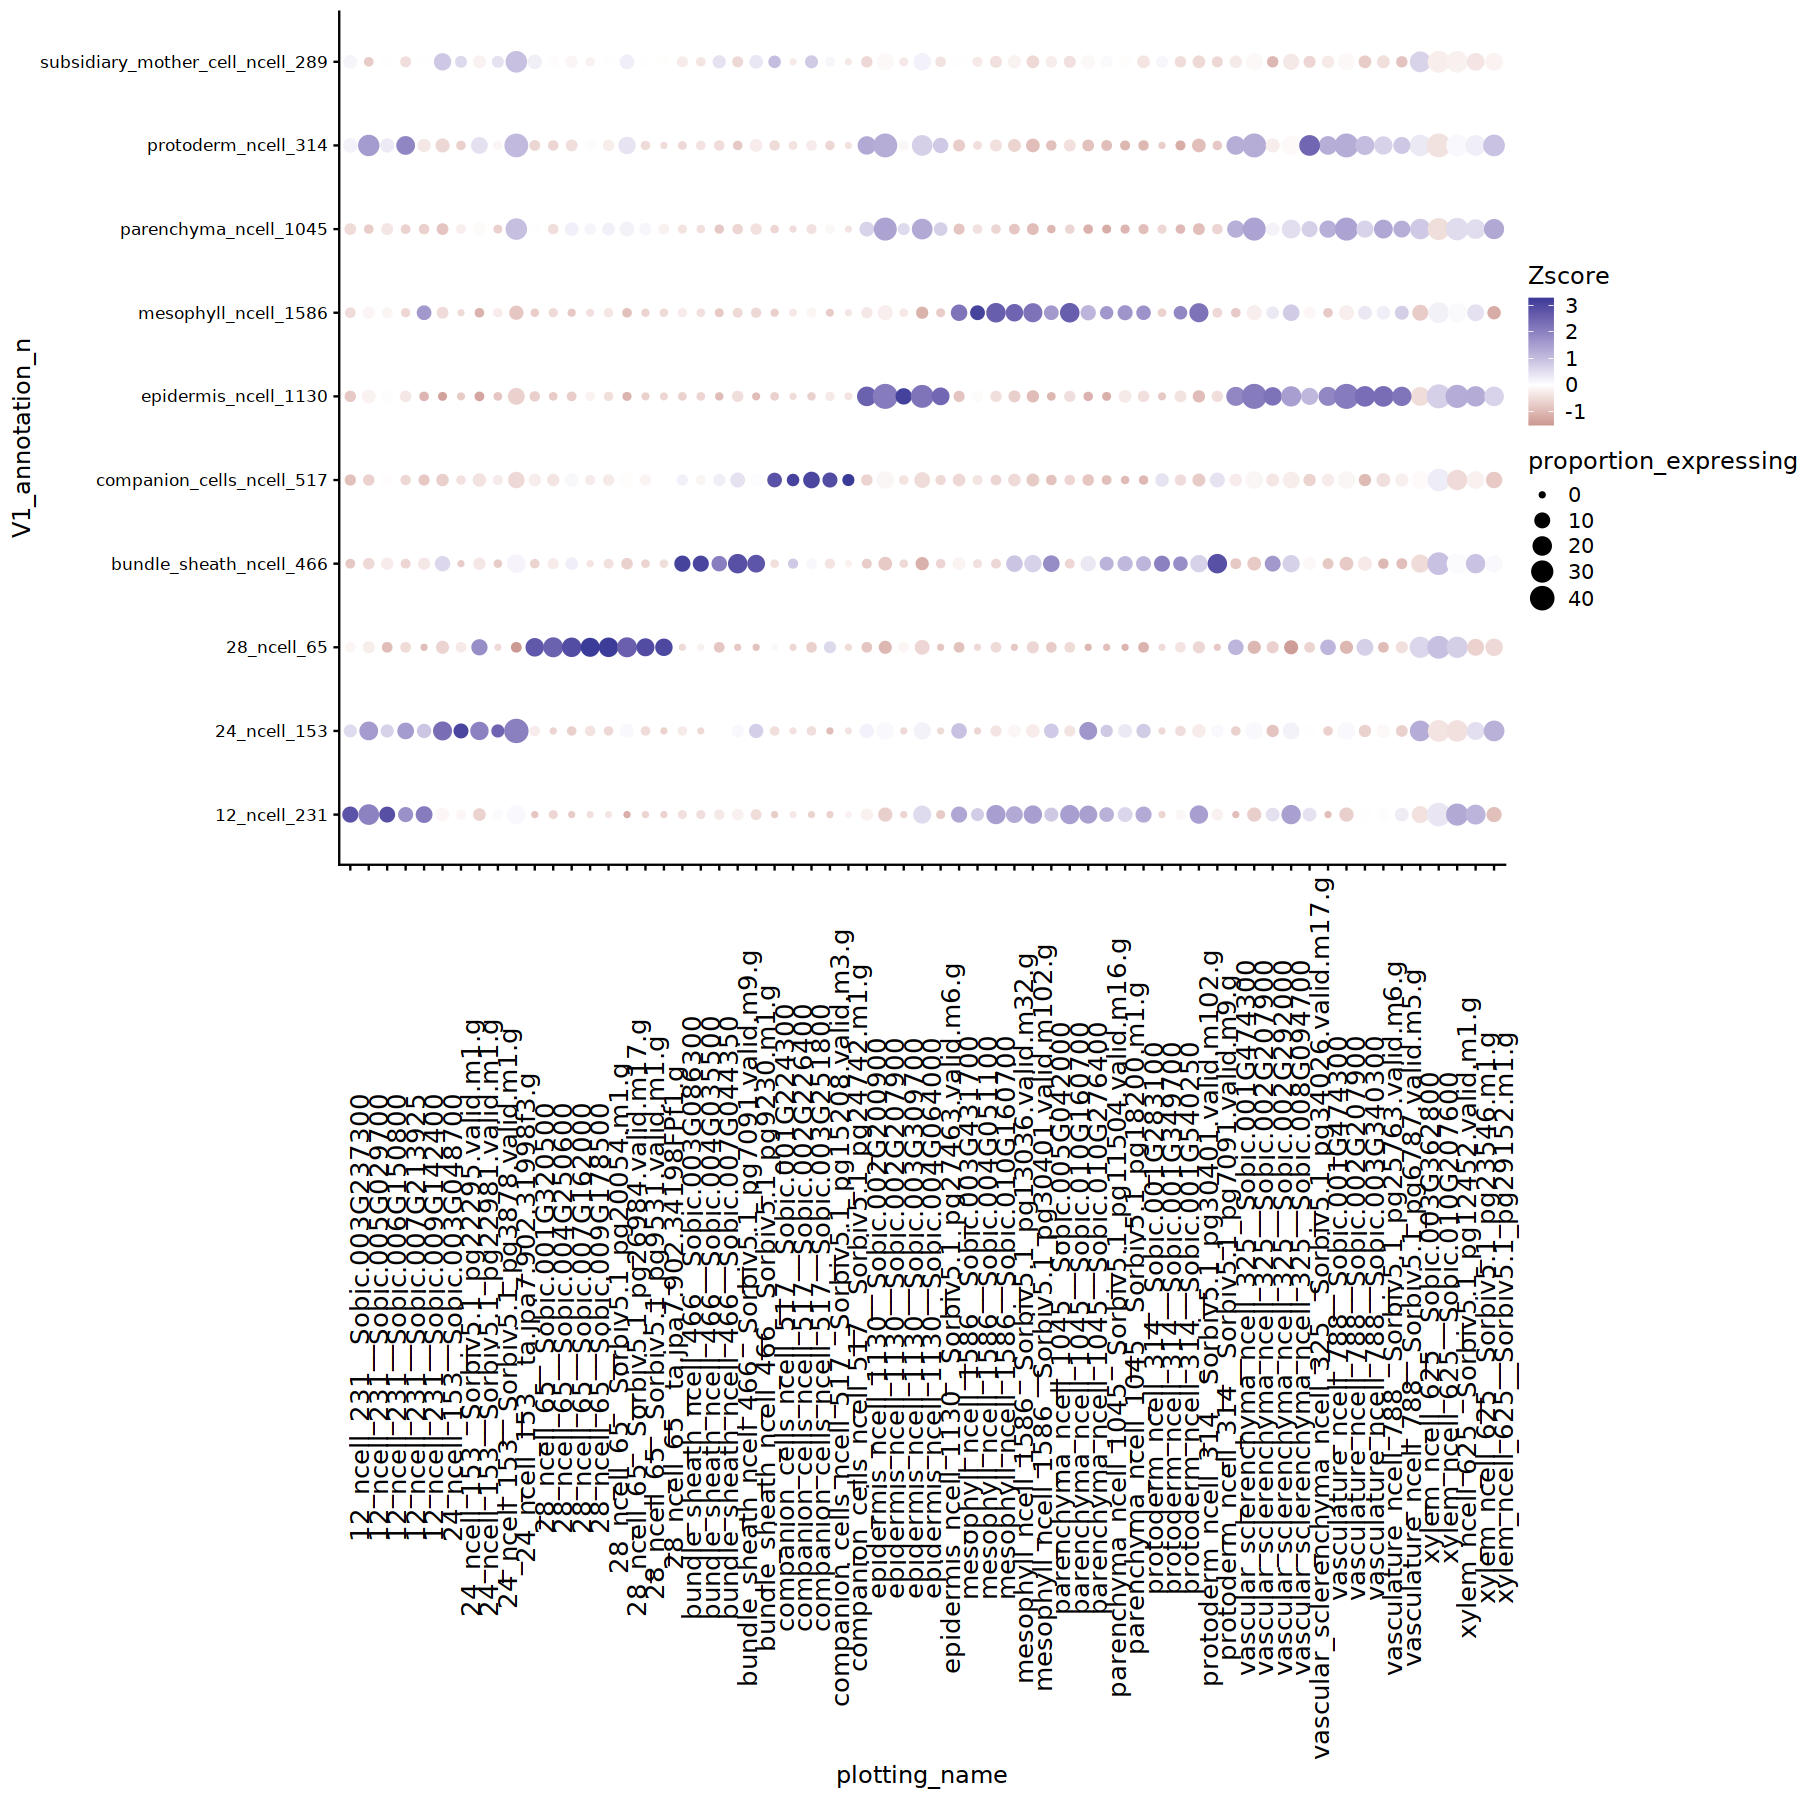

In [43]:
sb_dotplot_de_novo

In [44]:
ggsave("sb.annot_dotplot.pdf",
      plot = sb_dotplot_de_novo,
      path = "/home/jpm73279/EvoChromo_poster",
       units = "in",
       width = 15, height = 10)